##Importing all necessary libraries

In [5]:
import tensorflow as tf
import numpy as np
import zipfile as zp
import os
import pandas as pd

##Mounting Google Drive to Import Dataset from Google Drive

In [6]:
from google.colab import drive
import io
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importing DataSet

In [7]:
#Reading and saving the data 
insurance = pd.read_csv("/Medical_premium.csv")
insurance

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


##Visualizing Data

In [8]:
#Data values 
insurance.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


##Normalization and Standadization of Data

In [9]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

#Create a Column Transformer

ct = make_column_transformer(
    (MinMaxScaler(),["Age","Height","Weight","NumberOfMajorSurgeries"]),
    (OneHotEncoder(handle_unknown = "ignore"),["Diabetes","BloodPressureProblems","AnyTransplants","AnyChronicDiseases","KnownAllergies","HistoryOfCancerInFamily"])
)
#Creating X and Y values
x = insurance.drop("PremiumPrice",axis = 1)
y = insurance["PremiumPrice"]

#Create trainning and test set(use scikit)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)#20% test size

# Fit the column transformer to our training data
ct.fit(x_train)

#Transform trainning and test data normalization (MinMaxScaler) and one Hot
x_train_normal = ct.transform(x_train) 
x_test_normal = ct.transform(x_test)

In [10]:
x_train_normal.shape,x_train.shape

((788, 16), (788, 10))

##Steps in modelling with TensorFlow

`1.) Creating a model` - define the input and output layers, as well as the hidden layers of a deep learning model.

`2.) Compiling a model` - define the loss funtion (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).

`3.) Fitting a model` - letting the model try to find patterns between X & y (features and labels).

In [11]:
#Building a Neural Network
tf.random.set_seed(42)

#1. Create the model
model_insurance = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile Model
model_insurance.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

#3. Fitting the model
model_history = model_insurance.fit(
    x_train_normal,
    y_train,
    epochs = 450,
    verbose=0
)

##Plotting History Graph

Text(0.5, 0, 'Epochs')

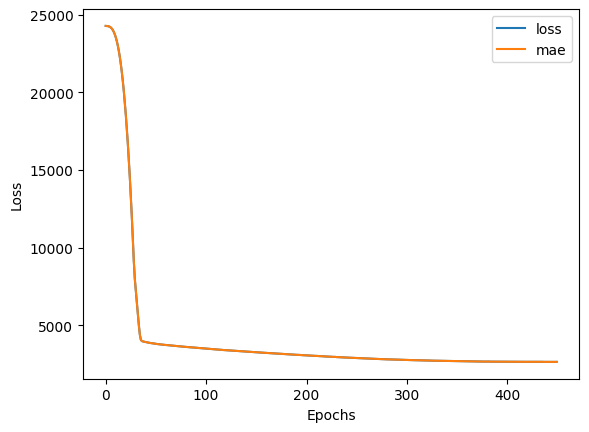

In [12]:
#plot history (also known as the loss curve)
import matplotlib.pyplot as plt
pd.DataFrame(model_history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [13]:
evaluated_value = model_insurance.evaluate(x_test_normal,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 2558.4124 - mae: 2558.4124


In [14]:
y_pred = model_insurance.predict(x_test_normal)

7/7 [==============================] - 0s 2ms/step


<Axes: >

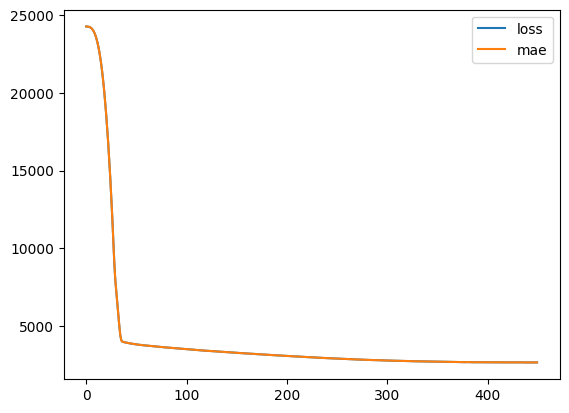

In [15]:
pd.DataFrame(model_history.history).plot()

In [16]:
model_insurance.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 dense (Dense)               (None, 100)               1700      

                                                                 

 dense_1 (Dense)             (None, 10)                1010      

                                                                 

 dense_2 (Dense)             (None, 1)                 11        

                                                                 


Total params: 2,721

Trainable params: 2,721

Non-trainable params: 0

_________________________________________________________________
